## **Описание проекта: оценка рисков невозврата кредита**

В вашем распоряжении данные клиентов банка «Скрудж», которые планируют взять кредит. Вам необходимо выяснить, что из имеющихся данных влияет на своевременное погашение кредита и каким именно образом.

Исследование поможет в создании модели кредитного скоринга — системы для оценки способности потенциального заёмщика погасить свой кредит.

По каждому клиенту есть информация о его семейном положении, образовании, доходе и другие данные. Вам предстоит подготовить данные к анализу и исследовать их, в процессе отвечая на вопросы.

### Описание данных

- `children` — количество детей в семье;
- `days_employed` — сколько дней работает клиент;
- `dob_years` — возраст клиента;
- `education` — уровень образования клиента;
- `education_id` — идентификатор образования клиента;
- `family_status` — семейное положение клиента;
- `family_status_id` — идентификатор семейного положения клиента;
- `gender` — пол клиента;
- `income_type` — тип дохода клиента;
- `debt` — был ли у клиента когда-либо просрочен платёж по кредиту;
- `total_income` — ежемесячный доход;
- `purpose` — причина оформления кредита.



__Цель работы__
- В рамках проекта необходимо проанализировать данные клинетов банка Скрудж для лдальнейшего опредления характеритсик заёмщика, влияющих на своевременное погашение кредита. Это поможет в дальнейшем создать основу для модели кредитного скоринга — системы для оценки способности потенциального заёмщика погасить свой кредит.

__План работы__ <a class="anchor" id="ch0"></a>

* [Первичный анализ данных ](#ch1)
* [Предобработка](#ch2)
* [Выбросы и аномальные значения](#ch3)
  - загрузка и изучение структуры данных
  - проверка и устранение пропущенных значений
  - устраненние некорректных значений
  - устранение неявных дубликатов
* [Создание дополнительных признаков](#ch4)
  - разделите клиентов по уровню дохода
  - разделение по возрастным группам
  - разделение по количеству детей
* [Исследование влияюших факторов](#ch5)
  - Уровень дохода
    - Анализ влияния дохода на своевременное погашение кредита
  - Образование
    - Исследование связи между уровнем образования и вероятностью задолженности
   - Возраст
     - Анализ возрастных категорий и их связи с задолженностью по кредитам
    - Количество детей
      - влияние количества детей на риск задолженности
* [Анализ данных](#ch5)
  - построение графиков и сводных таблиц для наглядной визуализации сравннеия должников и не должников 
* [Проверка исследовательских гипотез](#ch5)
  - У клиентов с детьми более высокий уровень финансовой ответственности и, следовательно, более низкий риск просрочек по кредиту.
  - Одинокие мужчины с низким доходом чаще оказываются должниками, чем семейные мужчины со средним доходом.
* [Выводы](#ch6)
  - описание полученных результатов и итоговые выводы проведённого исследования
  
* [Проведение дополнительного исследования](#ch7)   

__Датасет содержит данные, которые несут в себе информацию о клиентах банка Скрудж:__
- ___демография___
  - возраст, семейное положение, количество детей
- ___финансновые показатели___
  - уровень дохода, тип занятости
- ___данные об образовании___
- ___цель кредита___
- ____информацию о своевременности возврата кредита____


## Шаг 3. Выбросы и аномальные значения <a class="anchor" id="ch3"></a>

Изучите столбцы `total_income`, `dob_age`, `chidlren` на наличие выбросов и аномальных значений, в том числе при помощи графиков. Если выбросы или аномалии будут обнаружены — обоснованно примите решение об их судьбе. Используйте подзаголовки третьего уровня (`### Подзаголовок`), чтобы создать структуру действий в рамках этого шага.



### Проанализмруем столбцы total_income, dob_years и children методом describe()

In [128]:
display(df[['total_income', 'dob_years', 'children']].describe())

,total_income,dob_years,children
count,21454.000000,21454.000000,21454.000000
mean,26436.183035,43.271231,0.539946
std,15683.361605,12.570822,1.383444
min,3306.762000,0.000000,-1.000000
25%,17219.817250,33.000000,0.000000
50%,23202.870000,42.000000,0.000000
75%,31330.237250,53.000000,1.000000
max,362496.645000,75.000000,20.000000


- __total_income__:
  - минимальное значение 3306.76 и максимальное значение 362496.65(значительно превышает 75-й процентиль (31330.24)) указывают на наличие выбросов, соответственно  можно заменить экстремальные значения на медиану или удалить
  - среднее значени выше медианного
-  __dob_years__:
   - максимум 75 лет в пределах разумного, но  возраст  0 явно аномалия.
   - среднее значени близко к медианнму, что о говорит о возможной симметричности в распределении
- __children__:
  - присуствуюя явные аномальные значения -1 и 20, соответственно  можно заменить их на медиану или удалить.   

### Построим граифки для  столбцов total_income, dob_years и children

- используем для анализа аномалий и выборосов график boxplot и распределение на основе гистограммы

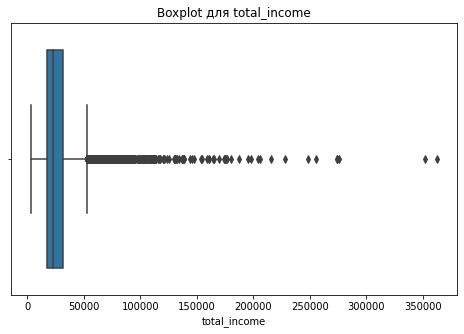

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика для `total_income`
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['total_income'])
plt.title('Boxplot для total_income')
plt.show()

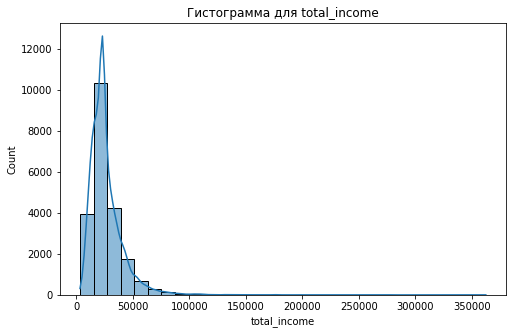

In [130]:
plt.figure(figsize=(8,5))
sns.histplot(df['total_income'], bins=30, kde=True)
plt.title('Гистограмма для total_income')
plt.show()

In [131]:
Q1 = df['total_income'].quantile(0.25)
Q3 = df['total_income'].quantile(0.75)
IQR=Q3-Q1
print(f'Нижняя граница : {Q1 - 1.5*IQR }')
print(f'Верхняя граница : {Q3 + 1.5*IQR }')

Нижняя граница : -3945.8127499999973
Верхняя граница : 52495.867249999996


- на графике видно, что есть значительное количество выбросов справа по данным в столбце total_income.
- есть значения, выходящие за верхний предел, что может указывать на аномалии.

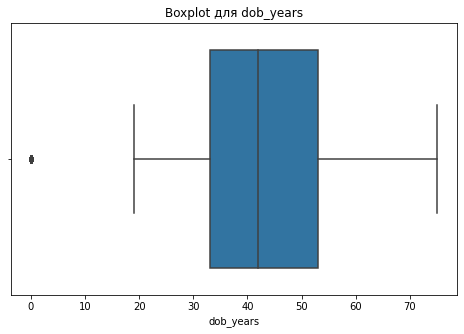

In [132]:
# Построение графика для `dob_years`
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['dob_years'])
plt.title('Boxplot для dob_years')
plt.show()

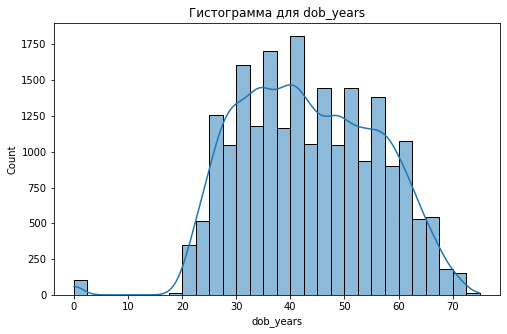

In [133]:
plt.figure(figsize=(8, 5))
sns.histplot(df['dob_years'], bins=30, kde=True)
plt.title('Гистограмма для dob_years')
plt.show()

In [134]:
Q1 = df['dob_years'].quantile(0.25)
Q3 = df['dob_years'].quantile(0.75)
IQR=Q3-Q1
print(f'Нижняя граница : {Q1 - 1.5*IQR }')
print(f'Верхняя граница : {Q3 + 1.5*IQR }')

Нижняя граница : 3.0
Верхняя граница : 83.0


- на графике видны выбросы сдева
- возраст 0 явно является явной аномалией, так как клтент не может быть младше 18 лет

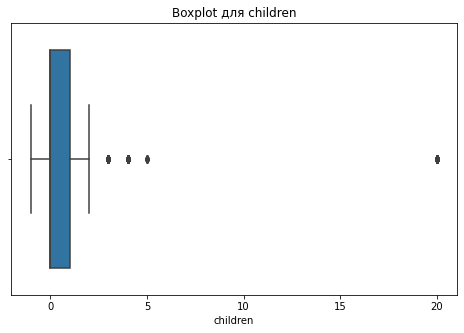

In [135]:
# Построение графика для `children`
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['children'])
plt.title('Boxplot для children')
plt.show()

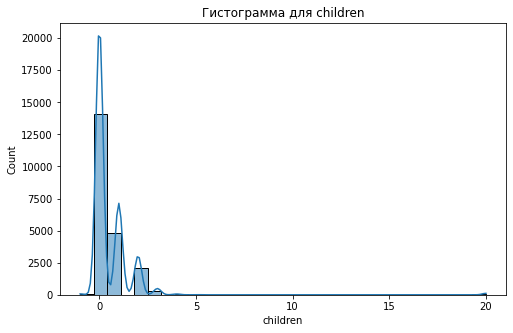

In [136]:
plt.figure(figsize=(8, 5))
sns.histplot(df['children'], bins=30, kde=True)
plt.title('Гистограмма для children')
plt.show()

- видно несколько выбросов справа (большое количество детей 20)
- на графике видно, что есть аномальные значени -1

### Решение по выбросам

- для колонки total_income(ежемесячный доход)
  - лучше удалить выбросы,чтоб они не искажади данные. 

In [137]:
upper_limit = df['total_income'].quantile(0.95)  # определение верхнего предела выбросов
df = df[df['total_income'] <= upper_limit]

In [138]:
df['total_income'].describe()

count    20381.000000
mean     24007.680143
std       9821.324564
min       3306.762000
25%      16823.508000
50%      23202.870000
75%      29411.892000
max      53039.263000
Name: total_income, dtype: float64

- для колонки dob_years(возраст клиента)
  - посмтотрим количсетво 0

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20381 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          20381 non-null  int64  
 1   days_employed     20381 non-null  float64
 2   dob_years         20381 non-null  int64  
 3   education         20381 non-null  object 
 4   education_id      20381 non-null  int64  
 5   family_status     20381 non-null  object 
 6   family_status_id  20381 non-null  int64  
 7   gender            20381 non-null  object 
 8   income_type       20381 non-null  object 
 9   debt              20381 non-null  int64  
 10  total_income      20381 non-null  float64
 11  purpose           20381 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [140]:
df[df['dob_years'] == 0].shape[0]

100

  - удалим 0

In [141]:
# Удалить строки, где dob_years равен 0
df = df[df['dob_years'] != 0]

In [142]:
df['dob_years'].describe()

count    20281.000000
mean        43.514274
std         12.323288
min         19.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

- для колонки children(количество детей в семье)
  - посмтотрим количсетво -1 и 20

In [143]:
df[df['children'] == -1].shape[0]


47

In [144]:
df[df['children'] == 20].shape[0]

73

  - удалим -1 и 20

In [145]:
# Удалить строки, где children равен -1
df = df[df['children'] != -1]

In [146]:
# Удалить строки, где children равен 20
df = df[df['children'] != 20]

In [147]:
df['children'].describe()

count    20161.000000
mean         0.470612
std          0.749234
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

___восопльзуемся еще раз describe для демонстрации статистики по столбцам и отсуствию выбросов___

In [148]:
display(df[['total_income', 'dob_years', 'children']].describe())

,total_income,dob_years,children
count,20161.000000,20161.000000,20161.000000
mean,23997.798351,43.519865,0.470612
std,9812.385382,12.329629,0.749234
min,3306.762000,19.000000,0.000000
25%,16817.222000,33.000000,0.000000
50%,23202.870000,43.000000,0.000000
75%,29410.209000,54.000000,1.000000
max,53039.263000,75.000000,5.000000


___также продулируем построение графиков для визуализации данных___

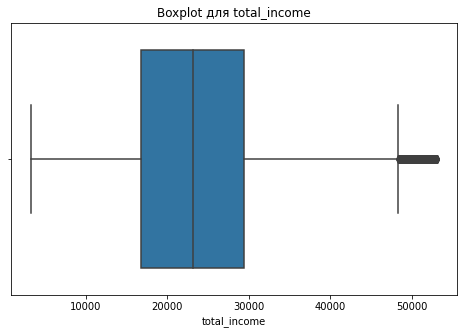

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика для `total_income`
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['total_income'])
plt.title('Boxplot для total_income')
plt.show()

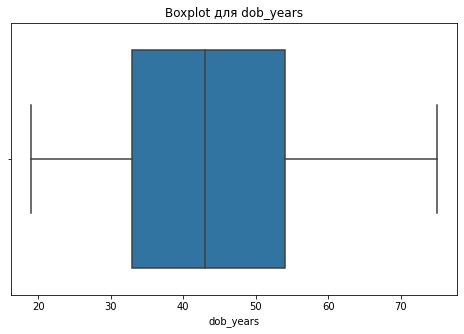

In [150]:
# Построение графика для `dob_years`
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['dob_years'])
plt.title('Boxplot для dob_years')
plt.show()

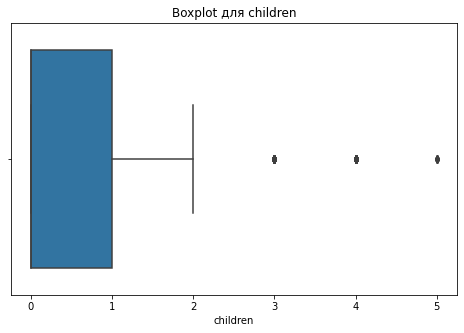

In [151]:
# Построение графика для `children`
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['children'])
plt.title('Boxplot для children')
plt.show()

___проверем информацию по исходной таблице и таблице на данном этапе анализа___

In [152]:
df_raw.shape

(21525, 12)

In [153]:
df.shape

(20161, 12)

In [154]:
#строк стало на 71 меньше
print(f'Количество строк стало меньше на : {round((1-df.shape[0]/df_raw.shape[0])*100,2)} процента')

Количество строк стало меньше на : 6.34 процента


<div class="alert alert-info">
  <b> * <a href="#ch0">к содержанию</a> </b> 
</div>


---